<a href="https://colab.research.google.com/github/yiwenwangANU/pytorch_kaggle/blob/main/Pytorch_Computer_Vision_Pistachio_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data download and explore

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pistachio-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 26.7M/26.7M [00:00<00:00, 28.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1


In [2]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
import os
print(os.listdir(path))

['Pistachio_Image_Dataset']


In [4]:
for root, dirs, files in os.walk(path):
    print(f"Current Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Current Directory: /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1
Subdirectories: ['Pistachio_Image_Dataset']
Files: []
----------------------------------------
Current Directory: /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset
Subdirectories: ['Pistachio_Image_Dataset', 'Pistachio_28_Features_Dataset', 'Pistachio_16_Features_Dataset']
Files: ['Pistachio_Image_Dataset_Request.txt']
----------------------------------------
Current Directory: /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset
Subdirectories: ['Siirt_Pistachio', 'Kirmizi_Pistachio']
Files: ['Pistachio_Image_Dataset_Request.txt']
----------------------------------------
Current Directory: /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio
Subdirecto

In [5]:
with open(path+'/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt', 'r') as file:
    print(file.read())

Citation Request :

1. OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2, pp. DOI:10.23751/pn.v23i2.9686.  (Open Access) https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178

2. SINGH D, TASPINAR YS, KURSUN R, CINAR I, KOKLU M, OZKAN IA, LEE H-N., (2022). Classification and Analysis of Pistachio Species with Pre-Trained Deep Learning Models, Electronics, 11 (7), 981. https://doi.org/10.3390/electronics11070981. (Open Access) 

Article Download (PDF):
1: https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178
2: https://doi.org/10.3390/electronics11070981

DATASET: https://www.muratkoklu.com/datasets/

ABSTRACT: In order to keep the economic value of pistachio nuts which have an important place in the agricultural economy, the efficiency of post-harvest industrial processes is very important. To provide this efficiency

In [6]:
data_path = path + '/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
data_path

'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset'

In [7]:
import glob
total_images = glob.glob(data_path + "/**/*.jpg")
kirmizi_images = glob.glob(data_path + '/Kirmizi_Pistachio/*.jpg')
siirt_images = glob.glob(data_path + '/Siirt_Pistachio/*.jpg')
print(f'Total number of images: {len(total_images)}')
print(f'Number of Kirmizi Pistachio: {len(kirmizi_images)}')
print(f'Number of Siirt Pistachio: {len(siirt_images)}')

Total number of images: 2148
Number of Kirmizi Pistachio: 1232
Number of Siirt Pistachio: 916


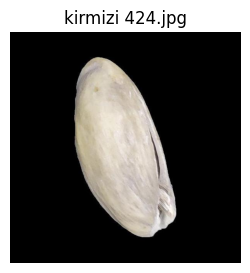

In [8]:
import random
import matplotlib.pyplot as plt
from PIL import Image

random_image = random.choice(total_images)
img = Image.open(random_image)
plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(img)
plt.title(random_image.split('/')[-1])
plt.show()

#Data Preprocessing

In [9]:
from torch.utils.data import Dataset

class PistachioDataset(Dataset):
  def __init__(self, root_dir, transform=None):
    self.root_dir = root_dir
    self.transform = transform
    self.image_paths = []
    self.labels = []
    self.classes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    self.label_dict = {idx:label for idx,label in enumerate(self.classes)} # {0:Kirmizi_Pistachio, 1:Siirt_Pistachio}

    for idx, label in self.label_dict.items():
      class_dir = os.path.join(root_dir, label)
      for file in os.listdir(class_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
          self.image_paths.append(os.path.join(class_dir, file))
          self.labels.append(idx)

  def __len__(self):
    return len(self.labels)


  def __getitem__(self, idx):
    image = Image.open(self.image_paths[idx]).convert("RGB")
    label = self.labels[idx]
    if self.transform:
      image = self.transform(image)
    return image, label

In [10]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),         # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

In [11]:
from torch.utils.data import DataLoader, random_split

dataset = PistachioDataset(root_dir=data_path, transform=transform)

# Split dataset into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"Total images: {len(dataset)}")
print(f"Training set size: {len(train_dataset)}")
print(f"Testing set size: {len(test_dataset)}")

Total images: 2148
Training set size: 1718
Testing set size: 430


In [12]:
# Define batch size
batch_size = 16

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Images shape: {images.shape}")  # Shape of the image tensor
    print(f"Labels shape: {labels.shape}")  # Shape of the label tensor
    print(f"Images data type: {images.dtype}")
    print(f"Labels data type: {labels.dtype}")
    print(f"First image tensor:\n{images[0]}")
    print(f"First label tensor: {labels[0]}")
    break  # Break after the first batch to avoid excessive output

Batch 1:
Images shape: torch.Size([16, 3, 32, 32])
Labels shape: torch.Size([16])
Images data type: torch.float32
Labels data type: torch.int64
First image tensor:
tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1

###CNN Model

In [24]:
from torch import nn

class Pistachio(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, padding=1), # keep the image size (32*32)
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # decrease image size to (16*16)
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(128*8*8, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 1)
    )
  def forward(self, x):
    return self.layer_stack(x)

model = Pistachio().to(device)

In [25]:
def accuracy_fu(y_pred, y_true):
  correct = torch.eq(y_pred,y_true).sum().item()
  return correct / len(y_pred) * 100

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=.001)

In [27]:
# initialize metric
!pip install torchmetrics
import torchmetrics
metric = torchmetrics.classification.BinaryAccuracy().to(device)

In [28]:
epoches = 5

for epoch in range(epoches):
  model.train()
  train_loss = 0.0
  for X_train, y_train in train_loader:
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_logits = model(X_train).squeeze()
    loss = loss_fn(y_logits, y_train.float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  model.eval()
  test_loss = 0.0
  with torch.inference_mode():
    test_loss = 0.0
    for X_test, y_test in test_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_logits = model(X_test).squeeze()
      loss = loss_fn(test_logits, y_test.float())
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_acc = accuracy_fu(y_pred=test_pred, y_true=y_test)
      test_loss += loss.item()
      acc = metric(test_pred, y_test)
    acc = metric.compute()
    print(f'epoch: {epoch}, train_loss: {train_loss:.2f}, test loss: {test_loss:.2f}, test accuracy: {acc:.4f}')

epoch: 0, train_loss: 40.72, test loss: 10.16, test accuracy: 0.8279069662094116
epoch: 1, train_loss: 34.31, test loss: 8.64, test accuracy: 0.8430232405662537
epoch: 2, train_loss: 32.62, test loss: 7.38, test accuracy: 0.8573643565177917
epoch: 3, train_loss: 29.89, test loss: 9.69, test accuracy: 0.8529070019721985
epoch: 4, train_loss: 27.16, test loss: 6.76, test accuracy: 0.8651162981987
